In [1]:
# Import necessary libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style to be clean and readable
sns.set(style="whitegrid")
sns.set_palette("muted")

# Configure pandas to display all columns (useful for wide clinical datasets)
pd.set_option('display.max_columns', None)

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# Define the file path (ensure the file is in the same directory as the notebook)
file_path = 'breast_msk_2018_clinical_data.tsv'

# Load the dataset using pandas
# 'sep=\t' is used because the file is Tab-Separated Values
try:
    df = pd.read_csv(file_path, sep='\t')
    print(f"Dataset loaded successfully with shape: {df.shape}")
except FileNotFoundError:
    print("Error: File not found. Please verify the file name and path.")

# Display the first 5 rows to inspect the structure
df.head()

Dataset loaded successfully with shape: (1918, 59)


,Study ID,Patient ID,Sample ID,Cancer Type,Cancer Type Detailed,Disease Free Event,Disease Free (Months),ER PCT Primary,ER Status of Sequenced Sample,ER Status of the Primary,Fraction Genome Altered,HER2 FISH Status of Sequenced Sample,HER2 FISH Ratio Value of Sequenced Sample,HER2 FISH Ratio Primary,HER2 FISH Status (Report and ASCO) of Primary,HER2 IHC Status Primary,HER2 IHC Score of Sequenced Sample,HER2 IHC Status of Sequenced Sample,HER2 IHC Score Primary,HER2 Primary Status,Overall HR Status of Sequenced Sample,Invasive Carcinoma Diagnosis Age,Time to Diagnosis Invasive Carcinoma,Last Communication Contact,Primary Tumor Laterality,Menopausal Status At Diagnosis,Metastatic Disease at Last Follow-up,Metastatic Recurrence Time,Mutation Count,M Stage,NGS Sample Collection Time Period,N Stage,Oncotree Code,Overall Survival (Months),Overall Survival Status,Overall HER2 Status of Sequenced Sample,Overall Patient HER2 Status,Overall Patient HR Status,Overall Patient Receptor Status,Overall Primary Tumor Grade,Primary Nuclear Grade,Prior Breast Primary,Prior Local Recurrence,PR PCT Primary,PR Status of Sequenced Sample,PR Status of the Primary,Receptor Status Primary,Number of Samples Per Patient,Site of Sample,Sample Type,Sex,Somatic Status,Stage At Diagnosis,Time To Death (Months),TMB (nonsynonymous),Tumor Sample Histology,Tumor Tissue Origin,T Stage,Patient's Vital Status
0,breast_msk_2018,P-0000004,P-0000004-T01-IM3,Breast Cancer,Breast Invasive Ductal Carcinoma,1,1.1,70,Positive,Positive,NaN,NaN,NaN,NaN,NaN,Negative,0-1+,Negative,1+,Negative,Positive,37,444.87,14484,Left,Pre,Yes,446.0,4.0,M1,445,N3a,IDC,31.5,0:LIVING,Negative,Negative,Positive,HR+/HER2-,II Intermediate Grade (Moderately Differentia...,III (High),No,No,22,Positive,Positive,HR+/HER2-,1,Treatment Naive Primary,Primary,Female,Matched,IV,NaN,0.133333,Breast Invasive Ductal Carcinoma,Breast,T1c,Alive
1,breast_msk_2018,P-0000012,P-0000012-T02-IM3,Breast Cancer,Breast Invasive Ductal Carcinoma,0,218.0,0,Negative,Negative,0.6891,NaN,NaN,NaN,NaN,Negative,0-1+,Negative,0-1+,Negative,Negative,43,516.48,22336,Right,Pre,No,NaN,1.0,M0,517,N0,IDC,218.0,0:LIVING,Negative,Negative,Negative,Triple Negative,III High Grade (Poorly Differentiated),III (High),No,No,0,Negative,Negative,Triple Negative,1,Treatment Naive Primary,Primary,Female,Matched,IIA,NaN,0.033333,Breast Invasive Ductal Carcinoma,Breast,T2,Alive
2,breast_msk_2018,P-0000015,P-0000015-T01-IM3,Breast Cancer,Breast Invasive Ductal Carcinoma,1,68.9,90,Positive,Positive,NaN,NaN,NaN,0.7,Negative,Negative,0+,Negative,0+,Negative,Positive,37,449.80,16656,Right,Pre,Yes,519.0,7.0,M0,534,N1mi,IDC,98.0,1:DECEASED,Negative,Negative,Positive,HR+/HER2-,III High Grade (Poorly Differentiated),II (Intermediate),No,No,30,Positive,Positive,HR+/HER2-,1,Liver,Metastasis,Female,Matched,IB,548.0,0.233333,Breast Invasive Ductal Carcinoma,Breast,T1b,Deceased
3,breast_msk_2018,P-0000041,P-0000041-T01-IM3,Breast Cancer,Breast Invasive Ductal Carcinoma,1,90.2,50,Positive,Positive,0.6367,Negative,0.24,NaN,NaN,Positive,2+,Equivocal,3+,Positive,Positive,43,513.68,19364,Left,Pre,Yes,604.0,10.0,M0,618,N0,IDC,123.1,1:DECEASED,Negative,Positive,Positive,HR+/HER2+,III High Grade (Poorly Differentiated),Unknown,No,No,50,Positive,Positive,HR+/HER2+,1,Breast,Metastasis,Female,Matched,IA,637.0,0.333333,Breast Invasive Ductal Carcinoma,Breast,T1b,Deceased
4,breast_msk_2018,P-0000057,P-0000057-T01-IM3,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,1,0.5,80,Positive,Positive,0.5093,NaN,NaN,NaN,NaN,Negative,0-1+,Negative,1+,Negative,Positive,38,458.36,15871,Left,Pre,Yes,459.0,5.0,M1,489,NX,MDLC,63.6,1:DECEASED,Negative,Negative,Positive,HR+/HER2-,II Intermediate Grade (Moderately Differentia...,II (Intermediate),No,No,50,Positive,Positive,HR+/HER2-,1,Post-Treatment Primary,Primary,Female,Matched,IV,522.0,0.166667,Breast Mixed Ductal and Lobular Carcinoma,Breast,TX,Deceased


In [3]:
# Display general information about the dataframe (data types, non-null counts)
print("Data Info:")
df.info()

# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# List all column names to identify relevant features for metastasis
print("\nColumn Names:")
print(df.columns.tolist())

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1918 entries, 0 to 1917
Data columns (total 59 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Study ID                                       1918 non-null   object 
 1   Patient ID                                     1918 non-null   object 
 2   Sample ID                                      1918 non-null   object 
 3   Cancer Type                                    1918 non-null   object 
 4   Cancer Type Detailed                           1918 non-null   object 
 5   Disease Free Event                             1918 non-null   int64  
 6   Disease Free (Months)                          1918 non-null   float64
 7   ER PCT Primary                                 1709 non-null   object 
 8   ER Status of Sequenced Sample                  1918 non-null   object 
 9   ER Status of the Primary                 

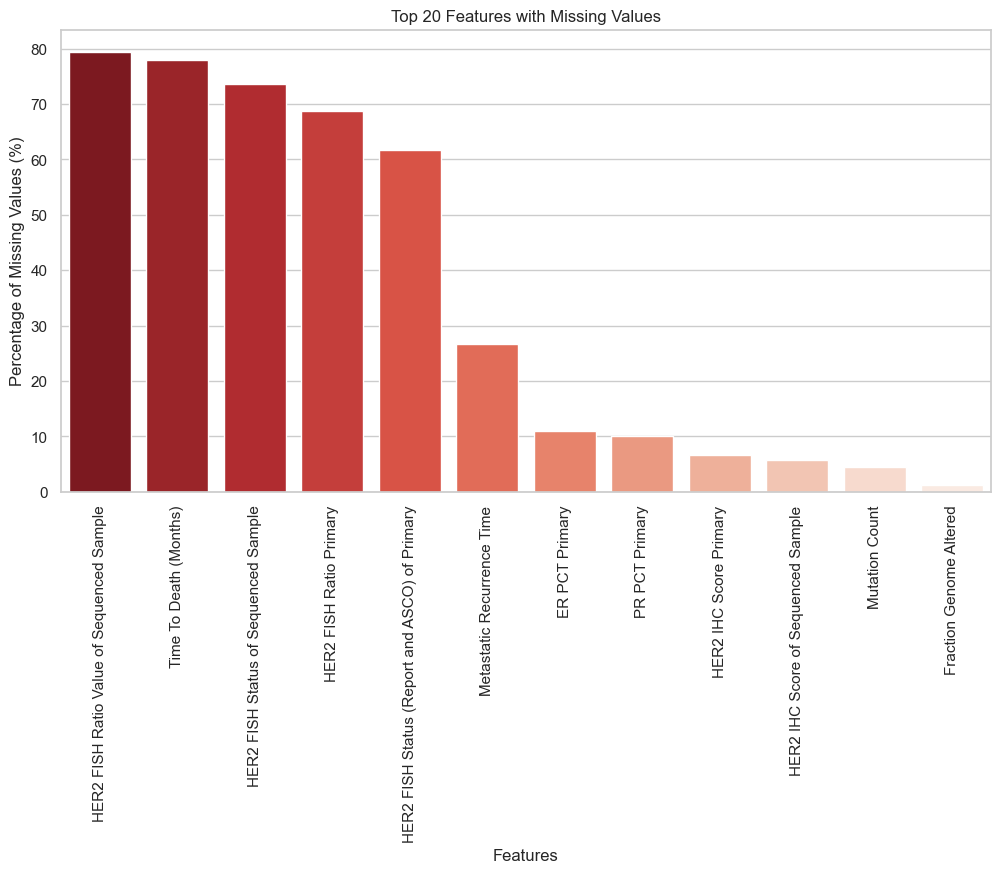

In [4]:
# Calculate percentage of missing values per column
missing_percent = df.isnull().mean() * 100
missing_data = missing_percent[missing_percent > 0].sort_values(ascending=False)

# Visualize the top 20 columns with the most missing data
plt.figure(figsize=(12, 6))
# Fixed: Added hue and legend=False to avoid FutureWarning
sns.barplot(x=missing_data.head(20).index, 
            y=missing_data.head(20).values, 
            hue=missing_data.head(20).index, 
            palette="Reds_r", 
            legend=False)

plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Percentage of Missing Values (%)')
plt.title('Top 20 Features with Missing Values')
plt.show()

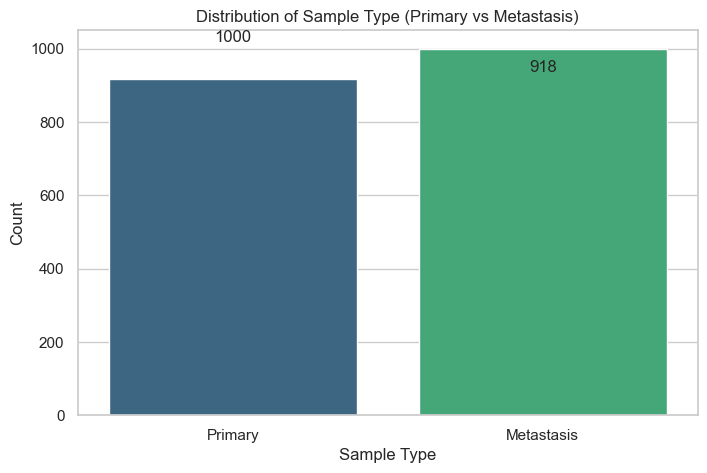

In [5]:
# Analyze the target variable: 'Sample Type'
target_counts = df['Sample Type'].value_counts()

plt.figure(figsize=(8, 5))
# Fixed: Added hue and legend=False
sns.countplot(x='Sample Type', data=df, hue='Sample Type', palette='viridis', legend=False)

plt.title('Distribution of Sample Type (Primary vs Metastasis)')
plt.xlabel('Sample Type')
plt.ylabel('Count')

# Add count labels on top of bars
for i, count in enumerate(target_counts):
    plt.text(i, count + 10, str(count), ha='center', va='bottom', fontsize=12)

plt.show()

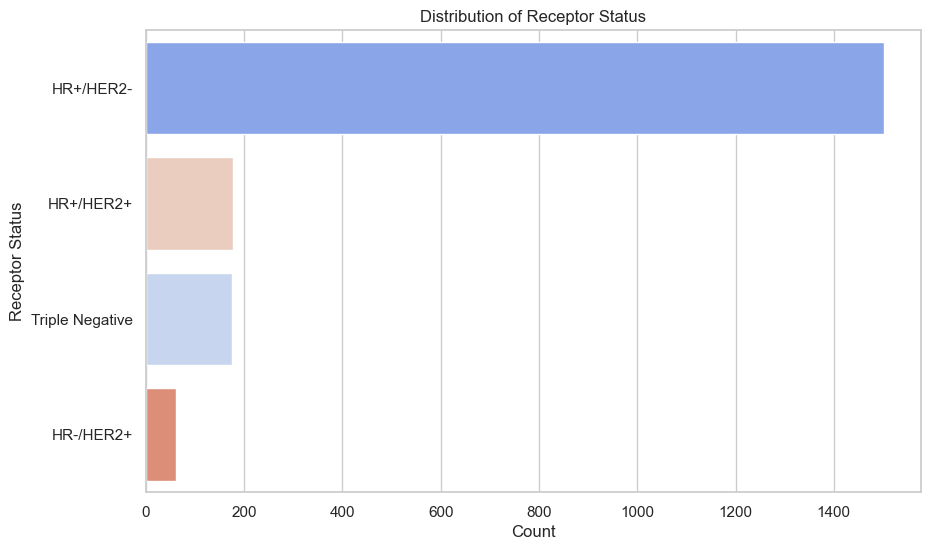

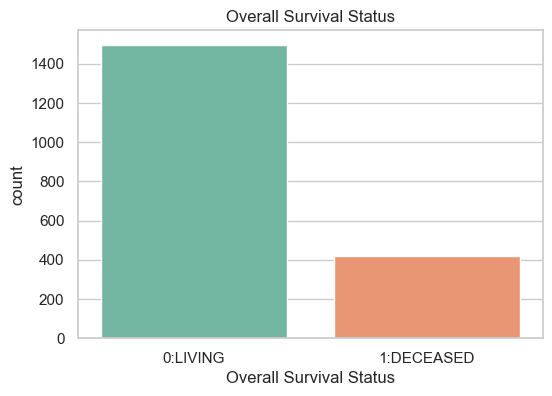

In [6]:
# Analyze 'Overall Patient Receptor Status'
plt.figure(figsize=(10, 6))
# Fixed: Added hue and legend=False
sns.countplot(y='Overall Patient Receptor Status', data=df, 
              order=df['Overall Patient Receptor Status'].value_counts().index, 
              hue='Overall Patient Receptor Status',
              palette='coolwarm',
              legend=False)
plt.title('Distribution of Receptor Status')
plt.xlabel('Count')
plt.ylabel('Receptor Status')
plt.show()

# Analyze 'Overall Survival Status'
plt.figure(figsize=(6, 4))
# Fixed: Added hue and legend=False
sns.countplot(x='Overall Survival Status', data=df, hue='Overall Survival Status', palette='Set2', legend=False)
plt.title('Overall Survival Status')
plt.show()

In [7]:
# Clean column names (remove spaces and special chars for easier coding later)
df.columns = df.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('/', '_')

print("New Column Names Example:", df.columns[:5].tolist())

# Save the loaded and initially inspected data
df.to_csv('breast_msk_2018_processed_step1.csv', index=False)
print("Processed data saved as 'breast_msk_2018_processed_step1.csv'")

New Column Names Example: ['Study_ID', 'Patient_ID', 'Sample_ID', 'Cancer_Type', 'Cancer_Type_Detailed']
Processed data saved as 'breast_msk_2018_processed_step1.csv'
